<a href="https://colab.research.google.com/github/Manjiri1101/ML-algo/blob/main/Manjiri_fractal_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 3**


**Wildfire Prediction -** *Climate friends*

Submission by - Manjiri Kadam

***Objective***:

1.   Apply fractal clustering on your dataset(s) 
2.   Write 2 objective functions for your domain to find the golden cluster
3.   SSE and Silhouette

**Dataset Used:**

*Kaggle* : https://www.kaggle.com/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt

*About dataset:*

This dataset consist of random 50000 samples from https://www.kaggle.com/rtatman/188-million-us-wildfires dataset. It has historic vagetation, weather data, and geographical coordinates of wildfire. From this dataset, I am going to use two columns. 

1.   Temp_pre_7 : temperature in deg C at the location of fire upto 7 days prior
2.   Hum_pre_7 : humidity in % at the location of fire upto 7 days prior




**Problem Statement for this assignment:**


Impact of temperature and Humidity on fire.
I have considered the temperature of place 7 days before fire started, and humidity level before 7 days.  

In [167]:
# Mounting the drive to read the dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [168]:
# Importing the required libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns; sns.set()  # styling of the plottings
import numpy as np
import pandas as pd 


In [169]:
# Reading the dataset in a dataframe
df = pd.read_csv('/content/gdrive/MyDrive/FW_Veg_Rem_combined.csv')
df.head(10)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,0,0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,NaN,NaN,NaN,1/12/2007,2007,Jan,785140,58917.69716,11603,1945,2018,12,1.0,785140-11603-2007.gz,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,1,1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,NaN,NaN,NaN,11/11/2006,2006,Nov,723235,32665.34327,13896,1978,2020,15,0.1,723235-13896-2006.gz,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,2,2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,NaN,NaN,NaN,1/30/2004,2004,Jan,723235,105122.14950,13896,1978,2020,16,1.0,723235-13896-2004.gz,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,3,3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,4,4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,NaN,NaN,NaN,8/23/1999,1999,Aug,722312,25940.57409,3908,1987,2016,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
5,5,5,NaN,1.0,B,Debris Burning,32.063900,-82.417800,GA,3/22/1999,NaN,Mar,NaN,NaN,NaN,2/20/1999,1999,Feb,722691,53847.19792,366,1942,2020,12,0.1,File Not Found,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.139643
6,6,6,NaN,5.2,B,Debris Burning,31.316978,-83.393649,GA,1/10/2009,NaN,Jan,NaN,NaN,NaN,12/11/2008,2008,Dec,747810,42972.94028,99999,2006,2020,12,0.1,747810-13857-2008.gz,14.877341,16.409326,0.000000,0.000000,2.000214,1.727202,0.000000,0.000000,79.896679,73.431818,0.000000,0.000000,26.0,0.0,0.0,0.0,0.148904
7,7,7,NaN,1.0,B,Campfire,30.904720,-93.557500,TX,11/12/2005,NaN,Nov,NaN,NaN,NaN,10/13/2005,2005,Oct,722820,64017.11754,99999,1984,2020,12,0.1,722820-99999-2005.gz,16.851939,16.997783,20.434783,11.985560,1.331257,1.472949,1.424783,2.148857,72.899478,75.061381,77.924623,70.732911,28.4,27.5,1.2,55.4,0.241894
8,8,8,NaN,1.0,B,Arson,35.900310,-92.061180,AR,8/8/2007,NaN,Aug,NaN,NaN,NaN,7/9/2007,2007,Jul,723448,42133.15187,53934,1973,2020,15,0.1,723448-53934-2007.gz,26.655241,27.264870,28.968064,28.682688,1.768074,1.705297,1.827944,2.103090,68.319022,67.575419,65.077844,60.196858,6.6,3.3,0.0,46.4,0.224629
9,9,9,CRAZY,1.0,B,Miscellaneous,48.839400,-99.718500,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.000000,6.380760,6.334254,6.645333,0.000000,64.606509,55.943038,54.337838,0.000000,12.3,1.8,0.0,0.0,0.291683


**Data Wrangling**

There are lots of Null valure in the dataset, cleaning those



In [170]:
# Data wrangling, dropping the NaN data rows
df =df.dropna()
df.head(3)

,Unnamed: 0,Unnamed: 0.1,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,disc_date_final,cont_date_final,putout_time,disc_date_pre,disc_pre_year,disc_pre_month,wstation_usaf,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,weather_file,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
3,3,3,WNA 1,1.0,B,Debris Burning,39.6414,-119.3083,NV,6/6/2005,6/6/2005,Jun,6/6/2005 2:14,6/6/2005 18:00,0 days 00:00:00.000000000,5/7/2005,2005,May,724880,43433.32978,23185,1942,2020,0,0.1,724880-23185-2005.gz,16.275967,18.996181,18.142564,0.0,4.054982,3.398329,3.671282,0.0,44.778429,37.140811,35.353846,0.0,10.4,7.2,0.0,0.0,0.487447
9,9,9,CRAZY,1.0,B,Miscellaneous,48.8394,-99.7185,ND,4/19/2004,4/19/2004,Apr,4/19/2004 20:30,4/19/2004 22:30,0 days 00:00:00.000000000,3/20/2004,2004,Mar,727675,129109.88140,99999,1936,2020,15,0.1,727675-99999-2004.gz,4.600950,6.861878,6.053333,0.0,6.380760,6.334254,6.645333,0.0,64.606509,55.943038,54.337838,0.0,12.3,1.8,0.0,0.0,0.291683
26,26,26,STO3573155,2.0,B,Debris Burning,35.7189,-92.3350,AR,1/19/2014,1/19/2014,Jan,1/19/2014 11:58,1/19/2014 13:02,0 days 00:00:00.000000000,12/20/2013,2013,Dec,720401,16806.87914,99999,2007,2020,15,0.1,720401-00133-2013.gz,3.490698,0.000000,0.000000,0.0,1.347442,0.000000,0.000000,0.0,76.091398,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.227270


In [171]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 17630 rows and 43 columns


In [172]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000,17630.000000
mean,31991.320987,31991.320987,5863.411612,39.333350,-103.592606,2005.643562,46105.962839,64880.797107,1982.371696,2015.945491,10.243846,23.607436,11.868726,12.129444,12.352660,6.428454,2.092224,2.016591,1.957576,0.808550,38.016112,35.999621,34.701832,13.917357,16.919694,7.632842,3.113460,1.387538,0.282817
std,17274.612000,17274.612000,25243.414718,7.990706,17.792929,6.620548,29011.501274,39888.561617,23.646211,6.563844,6.159713,39.218424,10.602849,10.811176,11.017718,10.475633,2.084527,2.098687,2.101837,1.908365,29.017390,28.832328,28.577253,23.462666,58.148588,34.172366,20.403541,11.977626,0.171748
min,3.000000,3.000000,0.510000,17.983333,-165.116700,1991.000000,128.528883,100.000000,1931.000000,1993.000000,0.000000,0.100000,-14.160823,-16.932091,-20.846104,-22.750000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000549
25%,16879.000000,16879.000000,2.000000,33.781723,-115.509290,2000.000000,24376.365692,24103.000000,1973.000000,2010.000000,4.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143292
50%,33381.000000,33381.000000,10.000000,37.459976,-104.430268,2006.000000,40262.173050,93874.000000,1984.000000,2020.000000,12.000000,1.000000,12.487918,12.720862,13.001786,0.000000,2.506616,2.407846,2.296949,0.000000,44.570989,41.771027,39.526796,0.000000,0.000000,0.000000,0.000000,0.000000,0.250500
75%,49896.500000,49896.500000,3200.000000,43.621858,-87.262338,2011.000000,61877.353498,99999.000000,2006.000000,2020.000000,15.000000,50.000000,21.265673,21.782275,22.049755,15.638889,3.586527,3.546508,3.472661,2.053009,64.319795,62.261574,60.344815,29.285517,10.275000,2.000000,0.000000,0.000000,0.409973
max,55365.000000,55365.000000,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,46.600000,51.567797,55.000000,55.000000,29.800000,29.800000,19.880606,24.200000,94.000000,94.000000,94.000000,92.000000,1816.000000,1273.000000,1187.000000,562.000000,0.988892


In [131]:
# df[['fire_size', 'Vegetation']] # Wanted to try different clustering
# df.head(5)
# plt.scatter(df['fire_size'], df['Vegetation'])

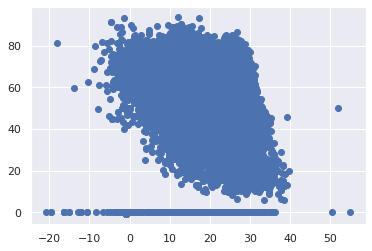

In [173]:
# Plotting the normal scatter plot to see the distribution
plt.scatter(df['Temp_pre_7'],df['Hum_pre_7'])

In [174]:
#Shrinking the dataframe and removing columns containing zero. As, absolute humidity cannot be "Zero"
df = df[['Temp_pre_7', 'Hum_pre_7']]
df = df[df['Hum_pre_7'] > 0]
df.head(4)

,Temp_pre_7,Hum_pre_7
3,18.142564,35.353846
9,6.053333,54.337838
31,-4.273834,71.173116
35,18.188679,60.328571


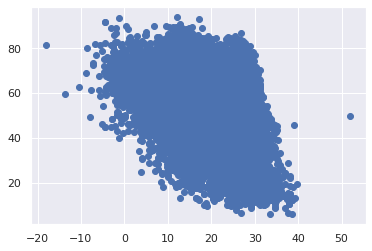

In [175]:
#trying to plot the scatter plot after removing all zeros
plt.scatter(df['Temp_pre_7'],df['Hum_pre_7'])

In [176]:
# Dropping the duplicates to see proper clustering
df.drop_duplicates()
print(f'There are {nRow} rows and {nCol} columns')
df.head(10)

There are 17630 rows and 43 columns


,Temp_pre_7,Hum_pre_7
3,18.142564,35.353846
9,6.053333,54.337838
31,-4.273834,71.173116
35,18.188679,60.328571
36,34.893333,18.208333
48,11.735795,40.645349
54,24.404023,37.622093
56,2.911842,85.369369
57,10.722222,68.287234
59,6.332934,53.125749


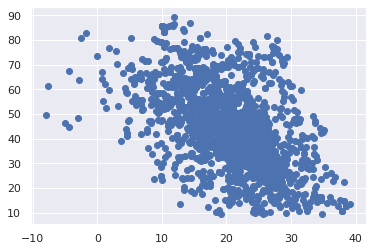

In [177]:
# To see good clustering dropped 10000 rows.
N = 10000
df = df.iloc[N: , :]
plt.scatter(df['Temp_pre_7'],df['Hum_pre_7'])

**Implementing K-means clustering**

Before starting the Fractal clustering, implementing normal K-means clustering on a dataset. 

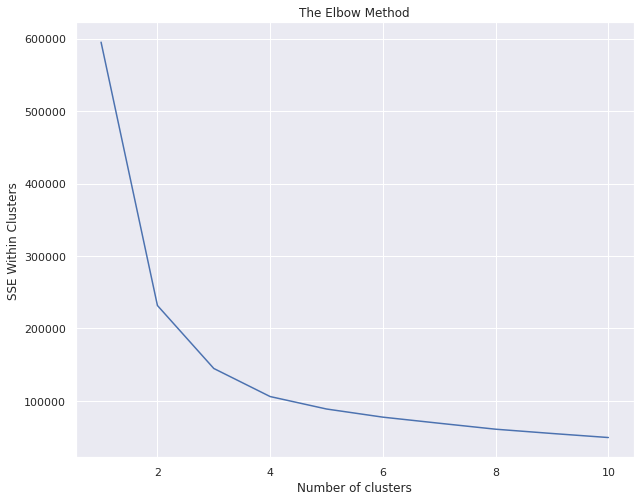

In [178]:
#Finding the value of K by using Elbow method
# Using Elbow method:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')

plt.xlabel('Number of clusters')
plt.ylabel('SSE Within Clusters')
plt.show()


From above, we can say that we have value of K=4

In [179]:
#Silhouette Score
from sklearn import metrics 
score = metrics.silhouette_score(df, kmeans.labels_, metric='euclidean', random_state=10)
print("silhouette score is " + str(score.round(2)))

silhouette score is 0.34


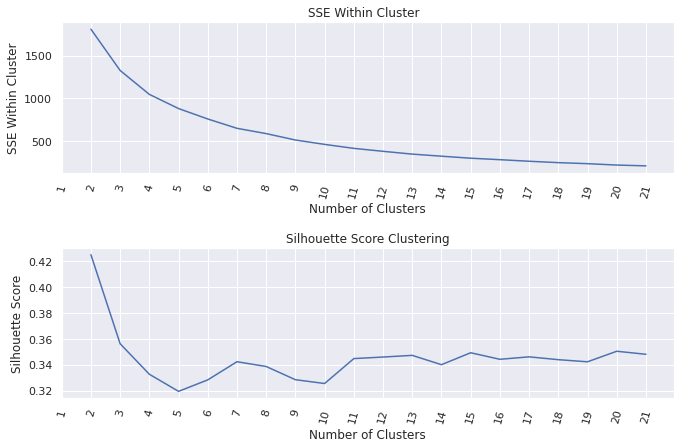

In [180]:
### Calculating and plotting the silhouette score plot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
sc = StandardScaler()
X_rb = sc.fit_transform(df)
    
sse_within_cluster = {}
silhouette_score = {}
    
for i in range(2, 22): # Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    kmeans = KMeans(n_clusters=i, random_state=42, init = 'k-means++', n_jobs=-1)
    kmeans.fit(X_rb)
    sse_within_cluster[i] = kmeans.inertia_
    silhouette_score[i] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=42)
plt.figure(figsize=(10,6))
ax1 = plt.subplot(211)
plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE Within Cluster")
plt.title("SSE Within Cluster  ")
plt.xticks([i for i in range(1, 22)], rotation=75)
ax2 = plt.subplot(212)
plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Clustering")
plt.xticks([i for i in range(1, 22)], rotation=75)
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [181]:

# Appling K-means clustering
kmeans=KMeans(n_clusters=4 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = kmeans.fit_predict(df)
y_km

array([3, 2, 2, ..., 2, 2, 0], dtype=int32)

In [182]:
df['Arry'] = y_km
df.head(10)

,Temp_pre_7,Hum_pre_7,Arry
52344,20.755952,22.910714,3
52345,21.635802,57.111111,2
52346,21.331906,46.989247,2
52347,18.513661,40.158470,1
52349,15.314607,37.022472,1
52350,21.724551,62.161677,0
52351,26.627841,29.514620,1
52352,21.382479,46.633047,2
52353,21.888889,60.432099,2
52354,18.375595,36.377246,1


In [183]:
#centroid
kmeans.cluster_centers_

array([[15.40850849, 69.87479078],
       [22.5951233 , 36.73254998],
       [17.72195105, 51.68524085],
       [26.01502571, 20.89168258]])

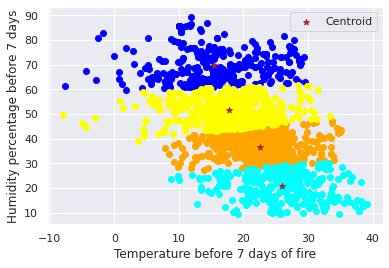

In [184]:
df1 = df[df.Arry==0]
df2 = df[df.Arry==1]
df3 = df[df.Arry==2]
df4 = df[df.Arry==3]
plt.scatter(df1.Temp_pre_7,df1.Hum_pre_7,color = 'blue')
plt.scatter(df2.Temp_pre_7,df2.Hum_pre_7, color = 'orange')
plt.scatter(df3.Temp_pre_7,df3.Hum_pre_7, color = 'yellow')
plt.scatter(df4.Temp_pre_7,df4.Hum_pre_7, color = 'cyan')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color ='brown', marker='*', label ='Centroid')
plt.xlabel("Temperature before 7 days of fire")
plt.ylabel('Humidity percentage before 7 days')
plt.legend()

**Applying Fractal Clustering in three iteration**

In [185]:
from sklearn.preprocessing import RobustScaler

In [186]:
def plot_cluster(df, max_loop=50):
  sc = StandardScaler()
  X_rb = sc.fit_transform(df)
      
  sse_within_cluster = {}
  silhouette_score = {}
      
  for i in range(2, max_loop): # Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1
      kmeans = KMeans(n_clusters=i, random_state=42, init = 'k-means++', n_jobs=-1)
      kmeans.fit(X_rb)
      sse_within_cluster[i] = kmeans.inertia_
      silhouette_score[i] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=42)

  plt.figure(figsize=(10,6))
  ax1 = plt.subplot(211)
  plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("SSE Within Cluster")
  plt.title("SSE Within Cluster  ")
  plt.xticks([i for i in range(1, 22)], rotation=75)

  ax2 = plt.subplot(212)
  plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Score")
  plt.title("Silhouette Score Clustering")
  plt.xticks([i for i in range(1, 22)], rotation=75)

  plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

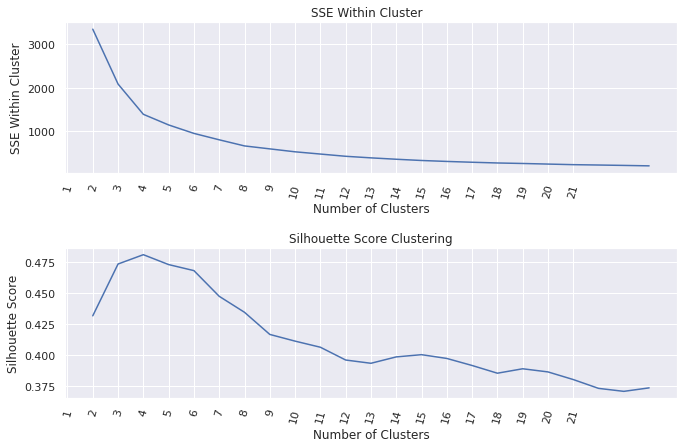

In [187]:
plot_cluster(df, max_loop=25)

In [188]:
# Creating the function for applying clustering
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    # X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(df)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10, n_jobs=-1)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df

**First Iteration**

In [189]:
### First Try: for first try for k=5 git (I tried this step several times to get good value for silhouette score)
first_try = apply_cluster(df, clusters=5)

clustering performance
-----------------------------------
silhouette score: 0.51
sse withing cluster: 682.0


In [190]:
cluster_perf_df = (
    first_try
    .groupby('cluster')
    .agg({"Temp_pre_7":"mean", "Hum_pre_7":"mean"})
    .sort_values('Temp_pre_7')
    .reset_index()
)
cluster_perf_df

,cluster,Temp_pre_7,Hum_pre_7
0,4,11.699695,49.253568
1,1,15.408508,69.874791
2,0,20.760724,51.759873
3,3,23.087293,36.801920
4,2,26.252619,20.866639


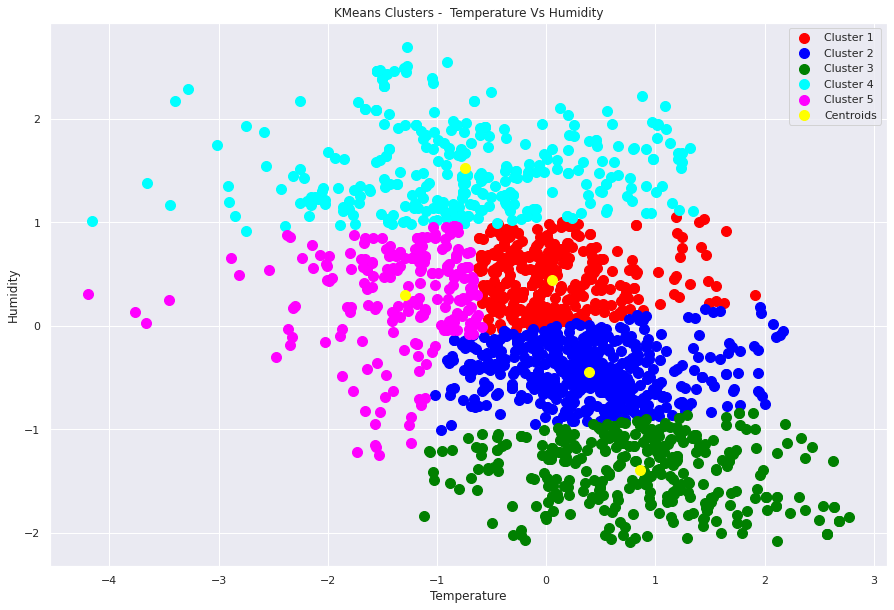

In [191]:
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler

# Standard Scaler
sc = StandardScaler()
S_c = sc.fit_transform(df)

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
ykm5 = kmeans.fit_predict(S_c)

plt.figure(figsize=(15,10))
plt.scatter(S_c[ykm5 == 0, 0], S_c[ykm5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[ykm5 == 1, 0], S_c[ykm5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[ykm5 == 2, 0], S_c[ykm5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[ykm5 == 3, 0], S_c[ykm5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[ykm5 == 4, 0], S_c[ykm5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(S_c[y_kmeans_13 == 5, 0], S_c[y_kmeans_13 == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
# plt.scatter(S_c[y_kmeans_13 == 6, 0], S_c[y_kmeans_13 == 6, 1], s = 100, c = 'yellow', label = 'Cluster 7')
# plt.scatter(S_c[y_kmeans_13== 7, 0], S_c[y_kmeans_13 == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
# plt.scatter(S_c[y_kmeans_13== 8, 0], S_c[y_kmeans_13 == 8, 1], s = 100, c = 'white', label = 'Cluster 9')
# plt.scatter(S_c[y_kmeans_13== 9, 0], S_c[y_kmeans_13 == 9, 1], s = 100, c = 'grey', label = 'Cluster 10')
# plt.scatter(S_c[y_kmeans_13== 10, 0], S_c[y_kmeans_13 == 10, 1], s = 100, c = 'purple', label = 'Cluster 11')
# plt.scatter(S_c[y_kmeans_13== 11, 0], S_c[y_kmeans_13 == 11, 1], s = 100, c = 'yellow', label = 'Cluster 12')
# plt.scatter(S_c[y_kmeans_13== 12, 0], S_c[y_kmeans_13 == 12, 1], s = 100, c = 'orange', label = 'Cluster 13')
# plt.scatter(S_c[y_kmeans_15== 5, 0], S_c[y_kmeans_15 == 13, 1], s = 100, c = 'brown', label = 'Cluster 14')
# plt.scatter(S_c[y_kmeans_15== 5, 0], S_c[y_kmeans_15 == 14, 1], s = 100, c = 'brown', label = 'Cluster 15')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters -  Temperature Vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
# plt.xticks([i for i in range(0, 10)], rotation=360)
# plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()

Apply K-means clustering on cluster 4

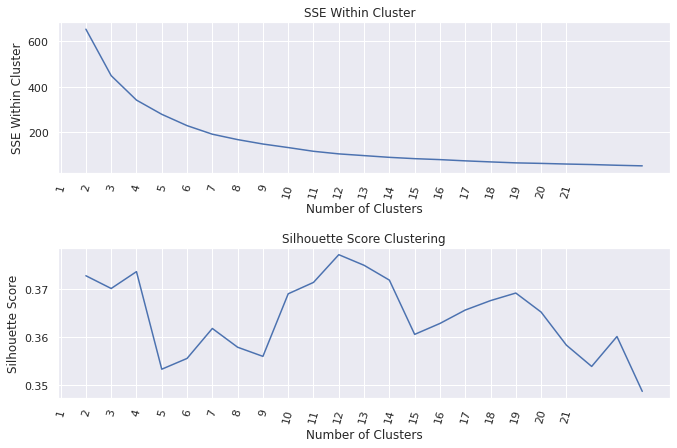

In [195]:
# # creating a dataframe that only consists of cluster 4
df_sub1 = df.query("cluster == 3 ").reset_index(drop=True)
plot_cluster(df_sub1, max_loop=25)


From above graph considering k = 5

In [200]:
second_try = apply_cluster(df_sub1, clusters=5)
# For k=5 we are getting good value for silhouette score

clustering performance
-----------------------------------
silhouette score: 0.37
sse withing cluster: 131.0


In [201]:
sub_cluster_perf_df = (
    second_try
    .groupby('cluster')
    .agg({"Temp_pre_7":"mean", "Hum_pre_7":"mean"})
    .sort_values('Temp_pre_7')
    .reset_index()
)

sub_cluster_perf_df

,cluster,Temp_pre_7,Hum_pre_7
0,3,17.785308,40.330498
1,2,19.663687,33.295366
2,0,23.320043,40.339636
3,4,25.521604,32.845593
4,1,31.497846,39.002441


**Second** iteration of clustering with K=5


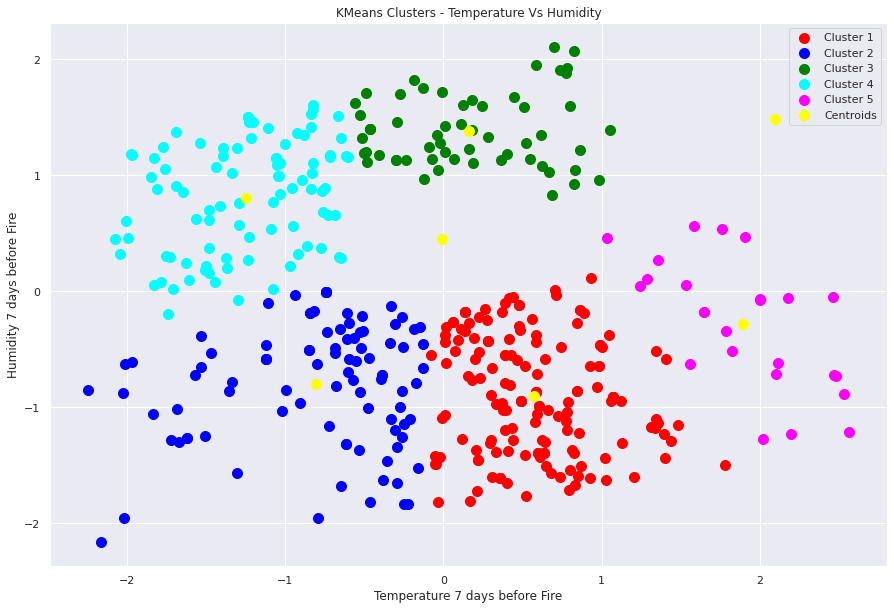

In [202]:
# Performing Kmeans using with K value 5
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
S_c = sc.fit_transform(df_sub1)

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
ykm6 = kmeans.fit_predict(S_c)

plt.figure(figsize=(15,10))
plt.scatter(S_c[ykm6 == 0, 0], S_c[ykm6 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[ykm6 == 1, 0], S_c[ykm6 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[ykm6 == 2, 0], S_c[ykm6 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[ykm6 == 3, 0], S_c[ykm6 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[ykm6 == 4, 0], S_c[ykm6 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(S_c[ykm6 == 5, 0], S_c[ykm6 == 5, 1], s = 100, c = 'brown', label = 'Cluster 6')
# plt.scatter(S_c[y_kmeans_5 == 6, 0], S_c[y_kmeans_5 == 6, 1], s = 100, c = 'yellow', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters - Temperature Vs Humidity')
plt.xlabel('Temperature 7 days before Fire')
plt.ylabel('Humidity 7 days before Fire')
# plt.xticks([i for i in range(0, 10)], rotation=360)
# plt.yticks([i for i in range(0, 10)], rotation=360)
plt.legend()
plt.show()


**Third Iteration for golden Clustering**

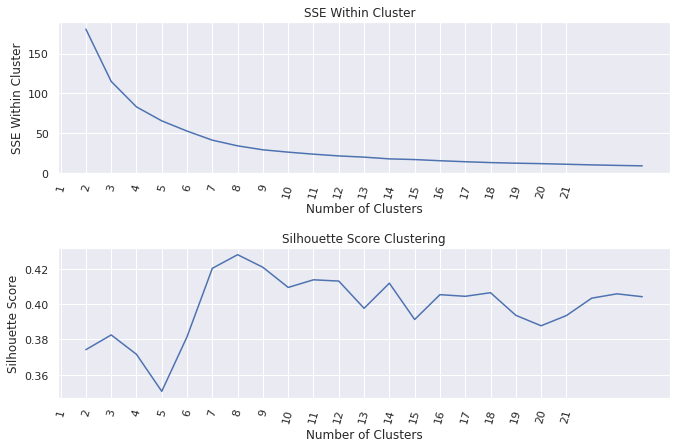

In [203]:
# creating a dataframe that only consists of cluster 1
df_sub2 = df_sub1.query("cluster == 0").reset_index(drop=True)
plot_cluster(df_sub2, max_loop=25)

In [204]:
third_try = apply_cluster(df_sub2, clusters=5)
# for cluster k = 5  we get good silhouette score for the dataset

clustering performance
-----------------------------------
silhouette score: 0.37
sse withing cluster: 28.0


In [205]:
df_sub2.head(5)

,Temp_pre_7,Hum_pre_7,Arry,cluster
0,21.101190,41.006061,1,2
1,21.017241,44.258621,1,3
2,25.745763,38.971751,1,0
3,20.658291,41.206030,1,2
4,22.573171,41.030675,1,2


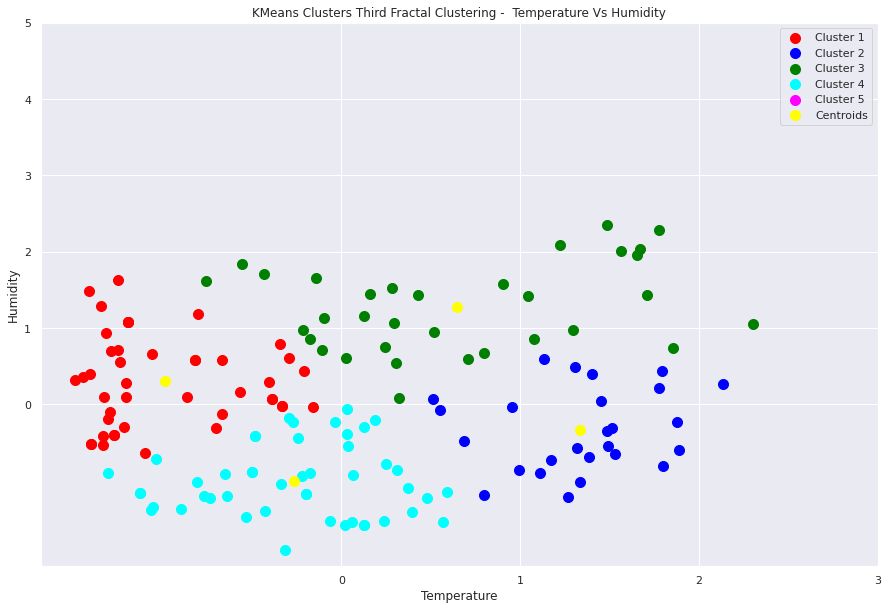

In [206]:
# Applying K-means clustering to third iteration
# Performing Kmeans using Clusters = 5
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
S_c = sc.fit_transform(df_sub2)

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans.fit_predict(S_c)
plt.figure(figsize=(15,10))
plt.scatter(S_c[y_kmeans_5 == 0, 0], S_c[y_kmeans_5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(S_c[y_kmeans_5 == 1, 0], S_c[y_kmeans_5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(S_c[y_kmeans_5 == 2, 0], S_c[y_kmeans_5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(S_c[y_kmeans_5 == 3, 0], S_c[y_kmeans_5 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(S_c[y_kmeans_5 == 4, 0], S_c[y_kmeans_5 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('KMeans Clusters Third Fractal Clustering -  Temperature Vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.xticks([i for i in range(0, 4)], rotation=360)
plt.yticks([i for i in range(0, 6)], rotation=360)
plt.legend()
plt.show()

In [207]:
best_sub_cluster_perf = (    
    third_try
    .groupby('cluster')
    .agg({"Temp_pre_7":"mean", "Hum_pre_7":"mean"})
    .sort_values('Temp_pre_7')
    .reset_index()
)
best_sub_cluster_perf

,cluster,Temp_pre_7,Hum_pre_7
0,2,21.401870,40.897741
1,1,22.831007,37.932228
2,3,23.235050,42.836795
3,0,25.776834,39.532125
4,4,26.092483,44.181824


**Inference**

We have implemented the fractal clustering on the dataset where, k-means clustering was applied to temperature and humidity attribute of the dataset.

Followed three step fractal clustering, and found the Golden cluster.

In last step, looking at the data we can infer that there were many fire with average temperature of 21C and having humidity % nearly to 40 %.